Seaborn is a data visualization library in Python built on top of Matplotlib, designed to simplify the creation of attractive, informative, and statistically-oriented graphics. It offers a higher-level interface that streamlines common visualization tasks, especially when working with statistical data and pandas DataFrames.

Seaborn vs. Matplotlib:
The key differences lie in their level of abstraction, ease of use, aesthetics, and intended purpose:

| Feature | Matplotlib | Seaborn |
|---------|------------|---------|
| Level of Abstraction | Low-level | High-level |
| Purpose | General-purpose plotting; ideal for basic and highly customized plots | Specialized for statistical data visualization and analysis |
| Ease of Use | Requires more code for complex visualizations and fine-tuning | Simpler syntax; creates complex plots with less code |
| Aesthetics | Basic default styles; requires manual customization for polish | Aesthetically pleasing defaults, built-in themes, and color palettes |
| Customization | Offers extensive, fine-grained control over every plot element | Provides fewer customization options but more attractive defaults; can be customized using Matplotlib's API |
| Data Integration | Works with NumPy arrays and pandas DataFrames, but may require manual data manipulation | Integrates seamlessly with pandas DataFrames, referencing columns by name directly |

When to Use Each:
The best approach often involves using both libraries in combination.

Use Matplotlib when:
- You need complete, fine-grained control over every aspect of your plot
- You are creating highly customized, publication-quality figures
- You need to build simple, custom visualizations that Seaborn doesn't offer a specific function for

Use Seaborn when:
- You want to quickly create visually appealing statistical plots with minimal code for exploratory data analysis (EDA)
- You are working primarily with pandas DataFrames
- You need specialized plots like heatmaps, violin plots, or pair plots, which are built-in to Seaborn

In practice, many data scientists use Seaborn to generate the initial plots and then use Matplotlib's API to further refine and customize specific elements.

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# Relational Plot
```python
A relational plot in Seaborn is a type of visualization designed to show the statistical relationship between two numerical variables. These plots are primarily used to identify patterns, trends, or correlations within a dataset.

The primary function used for creating these plots is sns.relplot(), which is a figure-level function that serves as a wrapper for creating either scatter plots or line plots.

Key Features of sns.relplot():
- Versatility: By using the kind parameter, you can choose between "scatter" (default) or "line"
- Semantic Mapping: Allows mapping of additional dimensions using hue (color), size (point size), and style (marker style) to visualize multi-dimensional data
- Faceting (Subplots): Creates subplots across rows and columns based on categorical variables, enabling complex analysis in a single figure

Examples:
- Scatter Plot (kind="scatter"): Ideal for visualizing the relationship between two continuous variables (e.g., total bill vs. tip)
- Line Plot (kind="line"): Ideal for showing trends over time or continuous intervals

Common Parameters:
- x, y: Variables for axes
- data: DataFrame
- kind: "scatter" or "line"
- hue: Grouping variable that produces different colors
- row, col: Defines subsets of data to be plotted in separate facets
- col_wrap: Number of columns to wrap, creating new rows

sns.relplot() is particularly useful for creating "small-multiples" or "lattice" plots, making it easy to compare relationships across different categories.

Basic Example:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset
tips = sns.load_dataset("tips")

# Create relational scatter plot
sns.relplot(data=tips, x="total_bill", y="tip",
            hue="time", style="sex", size="size",
            kind="scatter")

plt.title("Tips by Total Bill")
plt.show()
```

Example with Faceting:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset
tips = sns.load_dataset("tips")

# Create faceted relational plot
sns.relplot(data=tips, x="total_bill", y="tip",
            hue="day", col="time", row="sex",
            kind="scatter", height=4, aspect=1.2)

plt.show()
```

Line Plot Example:
```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create sample time series data
dates = pd.date_range('2023-01-01', periods=100)
df = pd.DataFrame({
    'date': dates,
    'value': np.random.randn(100).cumsum(),
    'category': np.random.choice(['A', 'B'], 100)
})

# Create relational line plot
sns.relplot(data=df, x='date', y='value',
            hue='category', kind='line',
            height=5, aspect=2)

plt.title("Time Series Trend")
plt.xticks(rotation=45)
plt.show()
```

In [ ]:
df_tele=pd.read_csv('/content/telecom_customer_data.csv')
df_tele.head()

,Call_Duration,Network_Provider,Satisfaction_Score
0,39,Provider B,5
1,52,Provider C,5
2,29,Provider C,6
3,15,Provider B,8
4,43,Provider C,6


In [ ]:
df_tele.shape

(500, 3)

TypeError: Legend.__init__() got an unexpected keyword argument 'size'

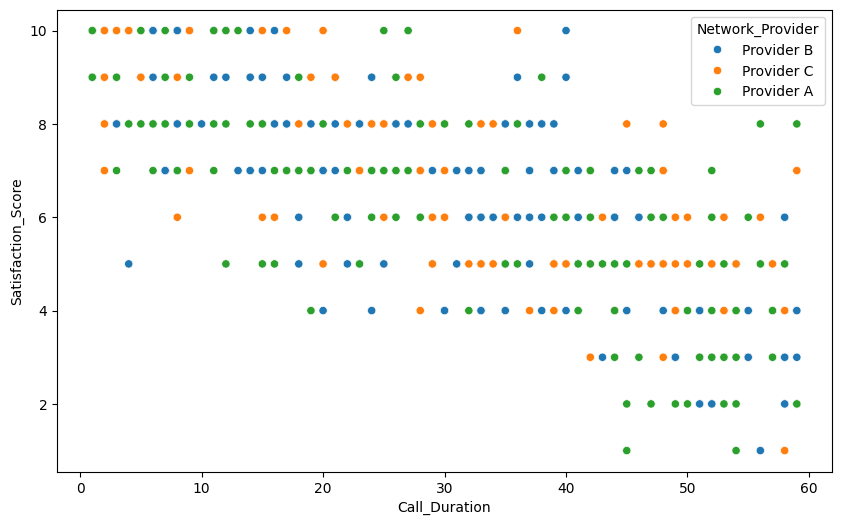

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Create a scatter plot using Seaborn
# - data: The DataFrame to use (df_tele)
# - x: Column for the x-axis ('Call_Duration')
# - y: Column for the y-axis ('Satisfaction_Score')
# - hue: Groups data points by 'Network_Provider' and assigns different colors
sns.scatterplot(data=df_tele,x='Call_Duration', y='Satisfaction_Score',hue='Network_Provider')

# Customize the legend
# - title: Sets the title of the legend
# -bbox_to_anchor: Specifies the legend's bounding box location in relation to the axes.
#                   (1., 1) means the upper-right corner of the plot area.
# - loc: Specifies the alignment of the legend box relative to the bbox_to_anchor coordinates.
#        'upper left' means the upper-left corner of the legend box will be placed at (1., 1).
plt.legend(title='Network Provider',bbox_to_anchor=(1., 1), loc='upper left', size='Satisfaction_Score')

# Set x-axis label
plt.xlabel('Call Duration (in minutes)')

# Set y-axis label
plt.ylabel('Satisfaction Score')

# Set the title of the plot
plt.title('Call Duration vs. Satisfaction Score')

# Adjust plot to ensure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Categorical Plot
Categorical plots in Seaborn are specialized visualizations designed to represent the relationship between a numerical variable and one or more categorical variables (e.g., sex, class, or type). Accessible primarily through sns.catplot(), they allow data grouping using semantic arguments—such as hue, size, or style—to visualize data distributions or estimations across different groups.

Key Types of Seaborn Categorical Plots:

Categorical Scatterplots (Individual Data Points):
- stripplot (default kind="strip"): Shows all data points with jitter added to reduce overlap
- swarmplot: Arranges points to prevent overlap for better density visualization

Categorical Distribution Plots (Distributions):
- boxplot: Displays the distribution of data, showing median, quartiles, and outliers
- violinplot: Combines boxplot with kernel density estimation
- boxenplot: Similar to a boxplot but better for large datasets (showing more quantiles)

Categorical Estimate Plots (Statistical Aggregations):
- barplot: Shows mean or other aggregate estimations with confidence intervals
- countplot: Shows the count of observations in each category
- pointplot: Shows point estimates and confidence intervals

Key Features:
- catplot Function: The main figure-level function (sns.catplot()) that allows easily switching between plot types
- hue Parameter: Enables splitting data within categories by a secondary categorical variable (e.g., color-coding by gender)
- Faceting: catplot can automatically create subplots based on categorical variables using col or row arguments

Basic Examples:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample dataset
tips = sns.load_dataset("tips")

# Categorical scatterplot (strip plot)
sns.catplot(data=tips, x="day", y="total_bill", kind="strip")
plt.title("Strip Plot - Total Bill by Day")
plt.show()

# Categorical distribution plot (boxplot)
sns.catplot(data=tips, x="day", y="total_bill", kind="box")
plt.title("Box Plot - Total Bill by Day")
plt.show()

# Categorical estimate plot (barplot with hue)
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="bar")
plt.title("Bar Plot - Total Bill by Day and Gender")
plt.show()

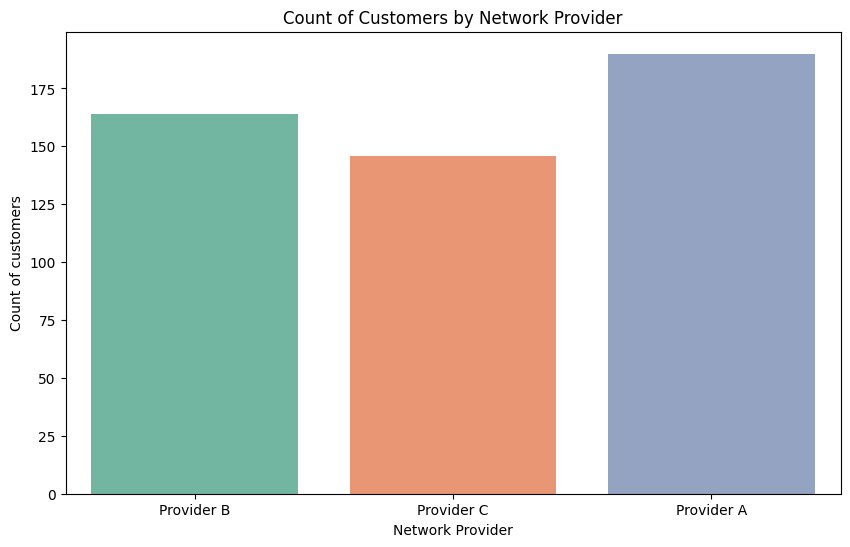

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Create a count plot using Seaborn
# - data: The DataFrame to use (df_tele)
# - x: Column for the categories on the x-axis ('Network_Provider')
# - hue: Column to use for coloring the bars. When x and hue are the same, it colors each bar distinctly by its category.
# - palette: Specifies the color palette to use for the bars.
sns.countplot(data=df_tele,x='Network_Provider',hue='Network_Provider',palette='Set2')

# Set the title of the plot
plt.title("Count of Customers by Network Provider")

# Set the label for the x-axis
plt.xlabel('Network Provider')

# Set the label for the y-axis
plt.ylabel('Count of customers')

# Display the plot
plt.show()

```python
The displot (distribution plot) is a figure-level function that provides a unified interface for visualizing the univariate and bivariate distribution of data. It is the recommended function in modern Seaborn versions (v0.11.0+) and replaces the now-deprecated distplot function.

Key Features and Functionality:

Versatile Plot Types:
The displot function can generate several different types of plots, specified by the kind parameter:
- kind="hist" (default): A traditional histogram, showing the count of observations within specified bins
- kind="kde": A Kernel Density Estimate plot, which displays the underlying probability density function using a smooth curve
- kind="ecdf": An Empirical Cumulative Distribution Function plot, which shows the proportion of observations that fall below each value in the dataset

Figure-Level Function:
As a figure-level function, displot manages the entire matplotlib figure and can easily create plots with multiple subplots (small multiples) by using the col or row parameters to split data by categorical variables.

Additional Features:
- Data Handling: Seamlessly integrates with pandas dataframes, allowing you to specify column names
- Bivariate Distributions: Can plot the distribution of two variables simultaneously
- Aesthetics: Supports conditional coloring using the hue parameter, as well as palettes, colors, height, and aspect ratio
- Rug Plots: Can add marginal ticks to show individual data points by setting rug=True

Basic Examples:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
penguins = sns.load_dataset("penguins")

# Histogram (default)
sns.displot(data=penguins, x="flipper_length_mm", kind="hist")
plt.title("Histogram of Flipper Length")
plt.show()

# KDE plot
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")
plt.title("KDE Plot of Flipper Length")
plt.show()

# ECDF plot
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")
plt.title("ECDF Plot of Flipper Length")
plt.show()
```

Examples with Hue and Faceting:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
penguins = sns.load_dataset("penguins")

# Histogram with hue (color by species)
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species", kind="hist", alpha=0.5)
plt.title("Flipper Length Distribution by Species")
plt.show()

# KDE with hue
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species", kind="kde", fill=True, alpha=0.3)
plt.title("KDE of Flipper Length by Species")
plt.show()

# Faceted histograms by species
sns.displot(data=penguins, x="flipper_length_mm",
            col="species", kind="hist", height=4, aspect=1)
plt.show()
```

Bivariate Distribution Example:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
penguins = sns.load_dataset("penguins")

# Bivariate distribution (2D histogram)
sns.displot(data=penguins, x="flipper_length_mm",
            y="bill_length_mm", kind="hist")
plt.title("Bivariate Distribution: Flipper vs Bill Length")
plt.show()

# Bivariate KDE
sns.displot(data=penguins, x="flipper_length_mm",
            y="bill_length_mm", kind="kde",
            hue="species", levels=10)
plt.title("Bivariate KDE by Species")
plt.show()
```

Example with Rug Plot:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Histogram with rug plot (shows individual points)
sns.displot(data=tips, x="total_bill",
            kind="hist", rug=True, height=5, aspect=1.5)
plt.title("Total Bill Distribution with Rug Plot")
plt.show()
```

# Plotting the Distribution of Call Duration


Standard deviation 16.81519245785756,
Mean 30.298


<Figure size 1000x1000 with 0 Axes>

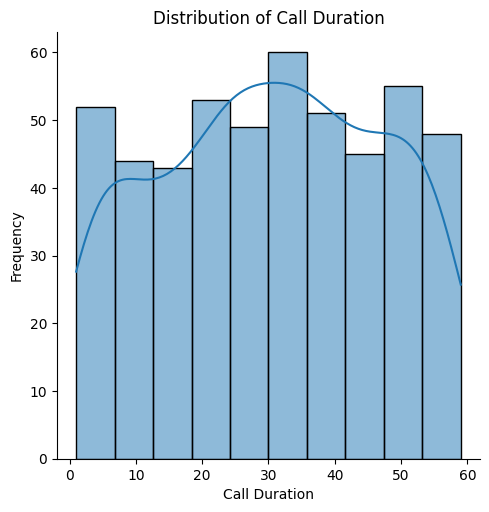

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(10,10))

# Create a histogram using Seaborn's histplot
# - df_tele['Call_Duration']: The numerical data to plot the distribution of.
# - bins: Specifies the number of bins (intervals) to divide the data into. Here, 10 bins are used.
# - kde: If True, a Kernel Density Estimate (KDE) curve is drawn on top of the histogram to show the probability density function.
sns.displot(df_tele['Call_Duration'],bins=10,kde=True)

# Print the standard deviation and mean of 'Call_Duration' for statistical insights.
print(f"Standard deviation {df_tele['Call_Duration'].std()},\nMean {df_tele['Call_Duration'].mean()}")

# Set the title of the plot
plt.title('Distribution of Call Duration')

# Set the x-axis label
plt.xlabel('Call Duration')

# Set the y-axis label
plt.ylabel('Frequency')

# Display the plot
plt.show()
plt.tight_layout() # This function automatically adjusts plot parameters for a tight layout.

Standard deviation 16.81519245785756,
Mean 30.298


<Figure size 1000x1000 with 0 Axes>

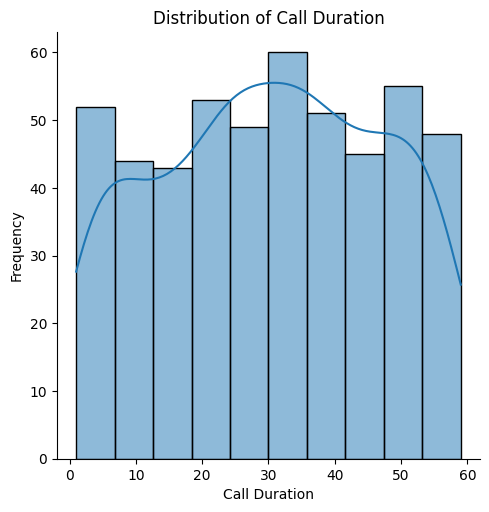

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(10,10))

# Create a histogram using Seaborn's histplot
# - df_tele['Call_Duration']: The numerical data to plot the distribution of.
# - bins: Specifies the number of bins (intervals) to divide the data into. Here, 10 bins are used.
# - kde: If True, a Kernel Density Estimate (KDE) curve is drawn on top of the histogram to show the probability density function.
# - rug: If True, draws a rug plot (small vertical lines) on the x-axis to indicate individual data points.
sns.displot(df_tele['Call_Duration'],kind="hist",bins=10, kde=True, rug=False)

# Print the standard deviation and mean of 'Call_Duration' for statistical insights.
print(f"Standard deviation {df_tele['Call_Duration'].std()},\nMean {df_tele['Call_Duration'].mean()}")

# Set the title of the plot
plt.title('Distribution of Call Duration')

# Set the x-axis label
plt.xlabel('Call Duration')

# Set the y-axis label
plt.ylabel('Frequency')

# Display the plot
plt.show()
plt.tight_layout() # This function automatically adjusts plot parameters for a tight layout.

# Matrix Plot
```python
A matrix plot in Seaborn is a data visualization technique used to display data in a 2D matrix format, where numerical values are represented by colors, allowing for quick identification of patterns, correlations, and trends. These plots require the data to be in a structured, matrix-like format (e.g., indexed rows and columns).

The primary types of matrix plots in Seaborn are Heatmaps and Clustermaps.

1. Seaborn Heatmap (sns.heatmap()):
A heatmap is a graphical representation where cell values are depicted by color, allowing you to visualize the intensity of data. It is frequently used to visualize correlation matrices or pivot tables.

Key Parameters:
- data: 2D dataset
- annot: Adds the numerical values inside the cells
- cmap: Defines the color palette (e.g., "coolwarm", "viridis", "magma")
- linewidths: Adds lines between cells for better readability
- fmt: Formats annotations (e.g., "d" for integers, ".2f" for 2 decimal places)
- cbar: Boolean to show or hide color bar

2. Seaborn Clustermap (sns.clustermap()):
A clustermap is a heatmap that performs hierarchical clustering on the data. It reorders rows and columns based on similarity, which is useful for discovering hidden structures or groups in complex datasets.

Key Parameters:
- data: 2D dataset
- standard_scale: Normalizes the data (0 for columns, 1 for rows)
- method: Linkage method for clustering (e.g., "single", "complete", "average")
- metric: Distance metric (e.g., "euclidean", "correlation")
- figsize: Size of the figure

Typical Use Cases:
- Correlation Matrices: Visualizing relationships between variables
- Heatmaps: Showing performance or frequency (e.g., passenger numbers by month and year)
- Clustermaps: Identifying similarities in data to group rows or columns

Example Code - Basic Heatmap:
```python
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create sample correlation matrix
np.random.seed(42)
data = np.random.randn(10, 10)
correlation_matrix = np.corrcoef(data)

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
```

Example - Heatmap with Real Data:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load flights dataset
flights = sns.load_dataset("flights")

# Create pivot table for heatmap
flights_pivot = flights.pivot_table(index="month",
                                    columns="year",
                                    values="passengers")

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(flights_pivot, annot=True, fmt="d",
            cmap="YlGnBu", linewidths=0.5)
plt.title('Monthly Passenger Numbers by Year')
plt.show()
```

Example - Clustermap:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = sns.load_dataset("iris")

# Create correlation matrix
corr = iris.corr()

# Create clustermap (automatically clusters similar rows/columns)
sns.clustermap(corr, annot=True, cmap='coolwarm',
               linewidths=0.5, figsize=(8, 8))
plt.title('Iris Dataset Correlation Clustermap')
plt.show()
```

Example - Advanced Clustermap:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = sns.load_dataset("iris")

# Prepare data (drop species for numerical data)
iris_numeric = iris.drop('species', axis=1)

# Create clustermap with row clustering (samples)
sns.clustermap(iris_numeric,
               method='average',     # Linkage method
               metric='euclidean',   # Distance metric
               standard_scale=1,     # Normalize columns
               cmap='viridis',
               figsize=(10, 8))
plt.title('Iris Dataset Clustermap')
plt.show()
```

Example - Customizing Heatmap Appearance:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Create pivot table
tips_pivot = tips.pivot_table(index='day',
                              columns='time',
                              values='total_bill',
                              aggfunc='mean')

# Customized heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(tips_pivot,
            annot=True,
            fmt='.1f',
            cmap='RdBu_r',
            center=tips_pivot.mean().mean(),  # Center colorbar
            linewidths=2,
            linecolor='white',
            cbar_kws={'label': 'Average Bill ($)'})
plt.title('Average Bill by Day and Time')
plt.show()
```

In [ ]:
import matplotlib.pyplot as plt

print("Colormaps (cmap) are used to map numerical data to colors in plots like heatmaps.")
print("They define the gradient of colors used to represent varying data values.")
print("For example, a 'viridis' colormap might show low values as dark purple and high values as bright yellow.")

print("\nHere are the first 10 available colormaps in Matplotlib (which Seaborn uses):")
print(list(plt.colormaps)[0:10])
print("\nTo see all available colormaps, you can remove the slicing `[0:10]` from `list(plt.colormaps)`.")
print("Some commonly used colormaps include 'viridis', 'plasma', 'inferno', 'magma', 'coolwarm', 'RdBu', 'YlGnBu', etc.")

Colormaps (cmap) are used to map numerical data to colors in plots like heatmaps.
They define the gradient of colors used to represent varying data values.
For example, a 'viridis' colormap might show low values as dark purple and high values as bright yellow.

Here are the first 10 available colormaps in Matplotlib (which Seaborn uses):
['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua']

To see all available colormaps, you can remove the slicing `[0:10]` from `list(plt.colormaps)`.
Some commonly used colormaps include 'viridis', 'plasma', 'inferno', 'magma', 'coolwarm', 'RdBu', 'YlGnBu', etc.


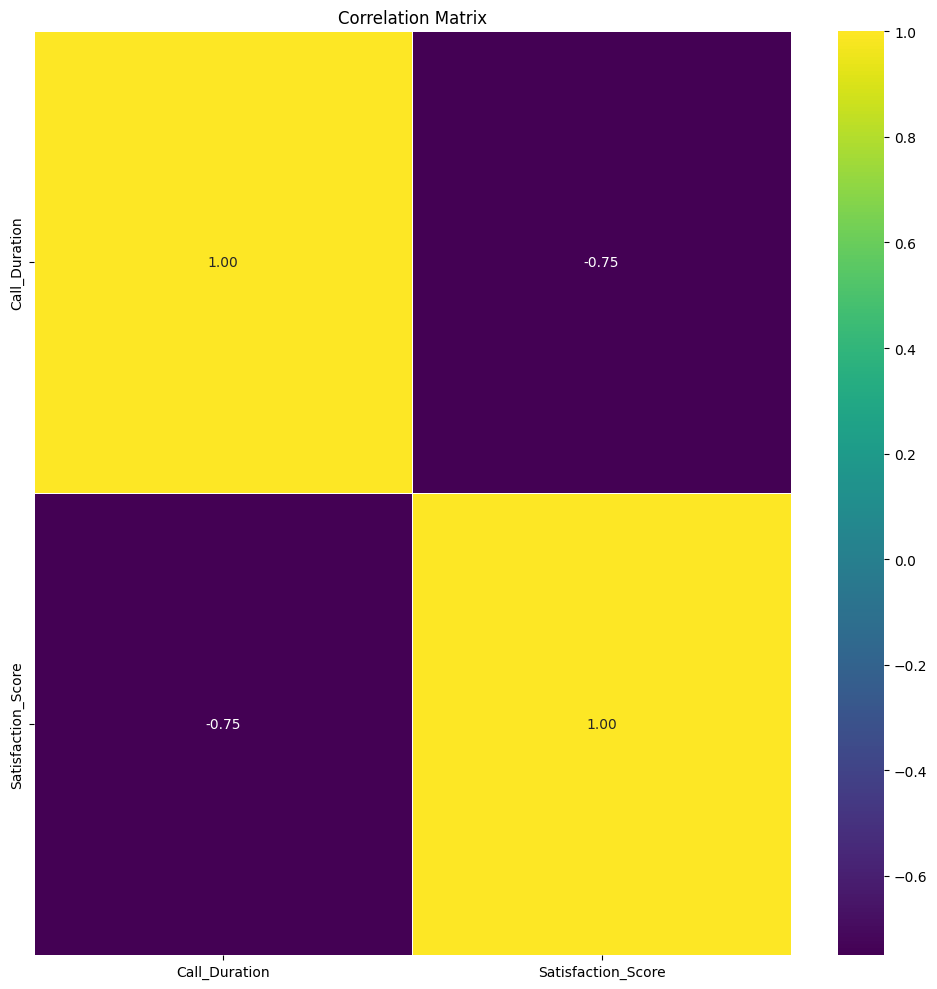

(None, None)

In [ ]:
plt.figure(figsize=(10,10))
# Selects only the numerical columns from the DataFrame `df_tele`.
# The 'include' parameter specifies the data types to select (integers, floats, and generic numbers).
numeric_df=df_tele.select_dtypes(include=['int64','float64','number'])
# Create a heatmap using Seaborn to visualize the correlation matrix
# - data: The correlation matrix of the numeric features from `df_tele`.
# - annot: If True, the correlation values will be displayed on the heatmap cells.
# - cmap: Specifies the colormap to use for the heatmap. 'viridis' is a perceptually uniform colormap.
# - fmt: String format code for the annotations (e.g., '.2f' displays values with two decimal places).
# - linewidth: Specifies the width of the lines that divide the cells in the heatmap.
sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis',fmt='.2f',linewidth=0.5)
plt.title('Correlation Matrix')
plt.tight_layout(),plt.show()

```python
A box plot (or box-and-whisker plot) in Seaborn is a categorical plot used to visualize the distribution of numerical data through their quartiles. It provides a concise summary of the dataset, making it easy to identify the median, spread, skewness, and outliers, particularly when comparing across multiple categories.

Key Components of a Seaborn Box Plot:
- Box (Interquartile Range - IQR): Represents the middle 50% of the data, spanning from the 25th percentile (Q1) to the 75th percentile (Q3)
- Median Line: A line inside the box marks the median (50th percentile) of the data
- Whiskers: Lines extending from the box to show the rest of the distribution, typically representing data within 1.5 times the IQR
- Outliers: Individual points plotted beyond the whiskers, representing anomalies or extreme values

Common Uses:
- Comparing Distributions: Ideal for visualizing the spread of numerical data across different categorical levels
- Identifying Skewness: Shows if the data is symmetric or skewed based on the position of the median and the length of the whiskers
- Detecting Outliers: Quickly highlights anomalies in the dataset

Key Parameters:
- data: The DataFrame or array containing the data
- x, y: Names of variables in the data to plot (input for long-form data)
- hue: Column name for color-coding the boxplots based on a second categorical variable
- orient: Orientation of the plot, either "v" (vertical) or "h" (horizontal)
- palette: Colors to use for the plot
- showmeans: Displays the mean as a marker (default is just the median)
- order: Define the order of the categories on the axis

Basic Example:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Basic vertical box plot
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Total Bill Distribution by Day")
plt.show()
```

Examples with Different Customizations:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Box plot with hue (subgroups)
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title("Total Bill by Day and Gender")
plt.show()

# Box plot with mean marker
sns.boxplot(data=tips, x="day", y="total_bill",
            showmeans=True, meanprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title("Total Bill Distribution with Mean Markers")
plt.show()

# Horizontal box plot
sns.boxplot(data=tips, y="day", x="total_bill", orient="h")
plt.title("Horizontal Box Plot - Total Bill by Day")
plt.show()
```

Example with Multiple Customizations:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
titanic = sns.load_dataset("titanic")

# Customized box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, x="class", y="age", hue="sex",
            palette="Set2", showmeans=True,
            meanprops={"marker": "D", "markerfacecolor": "black", "markersize": 6},
            order=["First", "Second", "Third"])  # Custom category order
plt.title("Age Distribution by Class and Gender on Titanic")
plt.ylabel("Age (years)")
plt.xlabel("Passenger Class")
plt.legend(title="Gender")
plt.grid(alpha=0.3)
plt.show()
```

Example with Notched Box Plot:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Notched box plot (shows confidence interval around median)
sns.boxplot(data=tips, x="day", y="total_bill", notch=True)
plt.title("Notched Box Plot - Total Bill by Day")
plt.show()
```

Example Comparing Multiple Variables:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load iris dataset
iris = sns.load_dataset("iris")

# Box plots for multiple numerical variables
# First melt the dataframe to long format
iris_melted = iris.melt(id_vars=["species"],
                        var_name="measurement",
                        value_name="value")

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_melted, x="measurement", y="value", hue="species")
plt.title("Iris Measurements Distribution by Species")
plt.xticks(rotation=45)
plt.show()
```

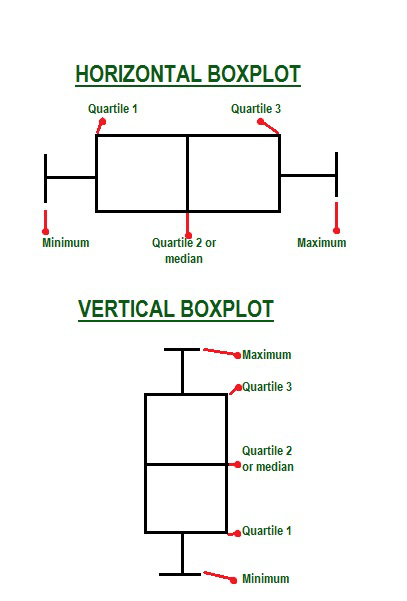

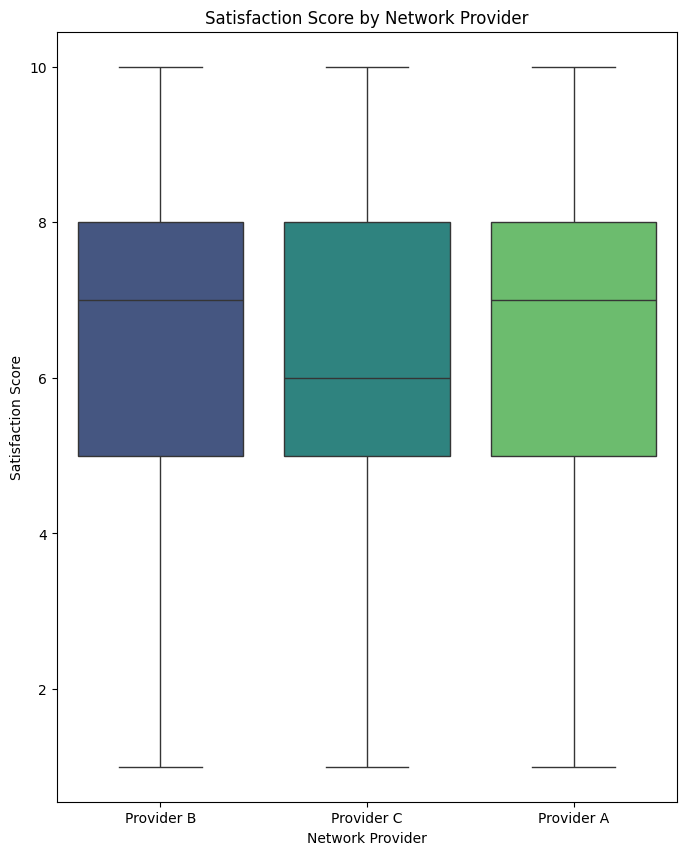

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# BoxPlot; Satisfaction score by network provider
# Set the figure size for better readability
plt.figure(figsize=(8,10))

# Create a box plot using Seaborn
# - data: The DataFrame to use (df_tele)
# - x: Column for the categorical variable on the x-axis ('Network_Provider')
# - y: Column for the numerical variable on the y-axis ('Satisfaction_Score')
sns.boxplot(data=df_tele,x='Network_Provider',y='Satisfaction_Score', hue="Network_Provider", palette="viridis")

# Set x-axis label
plt.xlabel('Network Provider')

# Set y-axis label
plt.ylabel('Satisfaction Score')

# Set the title of the plot
plt.title('Satisfaction Score by Network Provider')

# Display the plot
plt.show()

In [ ]:
df_tele.groupby('Network_Provider').mean()

,Call_Duration,Satisfaction_Score
Network_Provider,,
Provider A,30.494737,6.384211
Provider B,29.390244,6.567073
Provider C,31.061644,6.520548


# Violin Plot
```python
A violin plot in Seaborn (sns.violinplot()) is a data visualization tool used to depict the distribution of numeric data across one or more categorical variables. It is a hybrid of a box plot and a Kernel Density Estimation (KDE) plot.

Unlike a simple box plot, which only shows summary statistics (median, quartiles), a violin plot shows the full probability density of the data at different values, making it highly effective for identifying multimodal or skewed data.

Key Components of a Seaborn Violin Plot:
- Kernel Density Estimation (Outer Shape): The wide, violin-shaped, mirrored curve represents the data density. Wider sections mean higher frequency, while narrower sections mean lower frequency.
- Box Plot (Inner Details): By default, a miniature box-and-whisker plot is often rendered inside the density shape, displaying:
    - White Dot: The median
    - Thick Gray Bar: Interquartile range (IQR)
    - Thin Gray Lines: Whiskers/rest of the distribution
- Inner Parameters: The inner representation can be customized to show "box", "quartile", "point", "stick", or None.

When to Use Violin Plots:
- Comparing Distributions: Ideal for comparing the shape and spread of data across multiple categories
- Detecting Multimodality: Useful for spotting if data has more than one peak (multimodal/bimodal), which a box plot might miss
- Visualizing Large Datasets: As density plots, they are best when a fair amount of data is available to create stable estimates

Key Seaborn Parameters:
- data: The DataFrame
- x / y: Categorical and numerical variables
- hue: Splits the violins based on a second categorical variable (nested grouping)
- split: When using hue, this splits the violin in half, allowing for direct comparison of two distributions side-by-side
- inner: Controls internal representation ("box", "quartile", "point", "stick", None)
- scale: Determines how width is calculated ("area", "count", "width")
- bw / cut: Controls the smoothing of the density curve

Advantages vs. Disadvantages:
- Pros: Shows the complete distribution, density, and key statistics in one view
- Cons: Can be less intuitive to read for beginners compared to box plots, and may look messy with too many categories

Basic Example:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Basic violin plot
sns.violinplot(data=tips, x="day", y="total_bill")
plt.title("Total Bill Distribution by Day")
plt.show()
```

Examples with Different Customizations:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Violin plot with hue (subgroups)
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title("Total Bill Distribution by Day and Gender")
plt.show()

# Split violin plot (direct comparison)
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", split=True)
plt.title("Split Violin Plot - Direct Gender Comparison")
plt.show()

# Violin plot with different inner representation
sns.violinplot(data=tips, x="day", y="total_bill",
               inner="quartile", palette="Set2")
plt.title("Violin Plot with Quartile Markers")
plt.show()
```

Example with Multiple Customizations:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
titanic = sns.load_dataset("titanic")

# Customized violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=titanic, x="class", y="age", hue="sex",
               split=True, inner="box", palette="muted",
               scale="count", bw=0.2)
plt.title("Age Distribution by Class and Gender on Titanic")
plt.ylabel("Age (years)")
plt.xlabel("Passenger Class")
plt.legend(title="Gender")
plt.grid(alpha=0.3)
plt.show()
```

Comparing Box Plot vs Violin Plot:
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with multimodal data
tips = sns.load_dataset("tips")

# Create subplots to compare
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(data=tips, x="day", y="total_bill", ax=axes[0])
axes[0].set_title("Box Plot - Summary Statistics Only")

# Violin plot
sns.violinplot(data=tips, x="day", y="total_bill", ax=axes[1])
axes[1].set_title("Violin Plot - Full Distribution")

plt.tight_layout()
plt.show()
```

Example Detecting Multimodality:
```python
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create synthetic multimodal data
np.random.seed(42)
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(5, 1, 500)
bimodal_data = np.concatenate([data1, data2])

# Create dataframe
df = pd.DataFrame({
    'value': bimodal_data,
    'category': ['Bimodal'] * len(bimodal_data)
})

# Violin plot showing bimodal distribution
sns.violinplot(data=df, x='category', y='value')
plt.title("Violin Plot Detecting Bimodal Distribution")
plt.show()
```

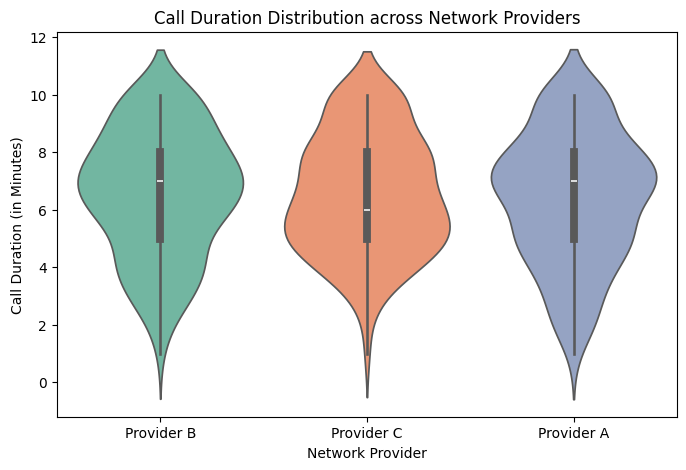

In [ ]:
plt.figure(figsize=(8,5))
# Create a violin plot using Seaborn
# - data: The DataFrame to use (df_tele)
# - x: Column for the categorical variable on the x-axis ('Network_Provider')
# - y: Column for the numerical variable on the y-axis ('Satisfaction_Score')
# - hue: Specifies a variable to map plot aspects to different colors. Here, it colors each violin distinctly by 'Network_Provider'.
# - palette: Sets the color scheme for the plot, 'Set2' provides distinct colors for categorical data.
sns.violinplot(data=df_tele,x='Network_Provider',y='Satisfaction_Score', hue='Network_Provider', palette='Set2')
# Set the title of the plot
plt.title("Call Duration Distribution across Network Providers")
# Set the x-axis label
plt.xlabel("Network Provider")
# Set the y-axis label
plt.ylabel("Call Duration (in Minutes)")
# Display the plot
plt.show()